IndexError: index 0 is out of bounds for axis 0 with size 0

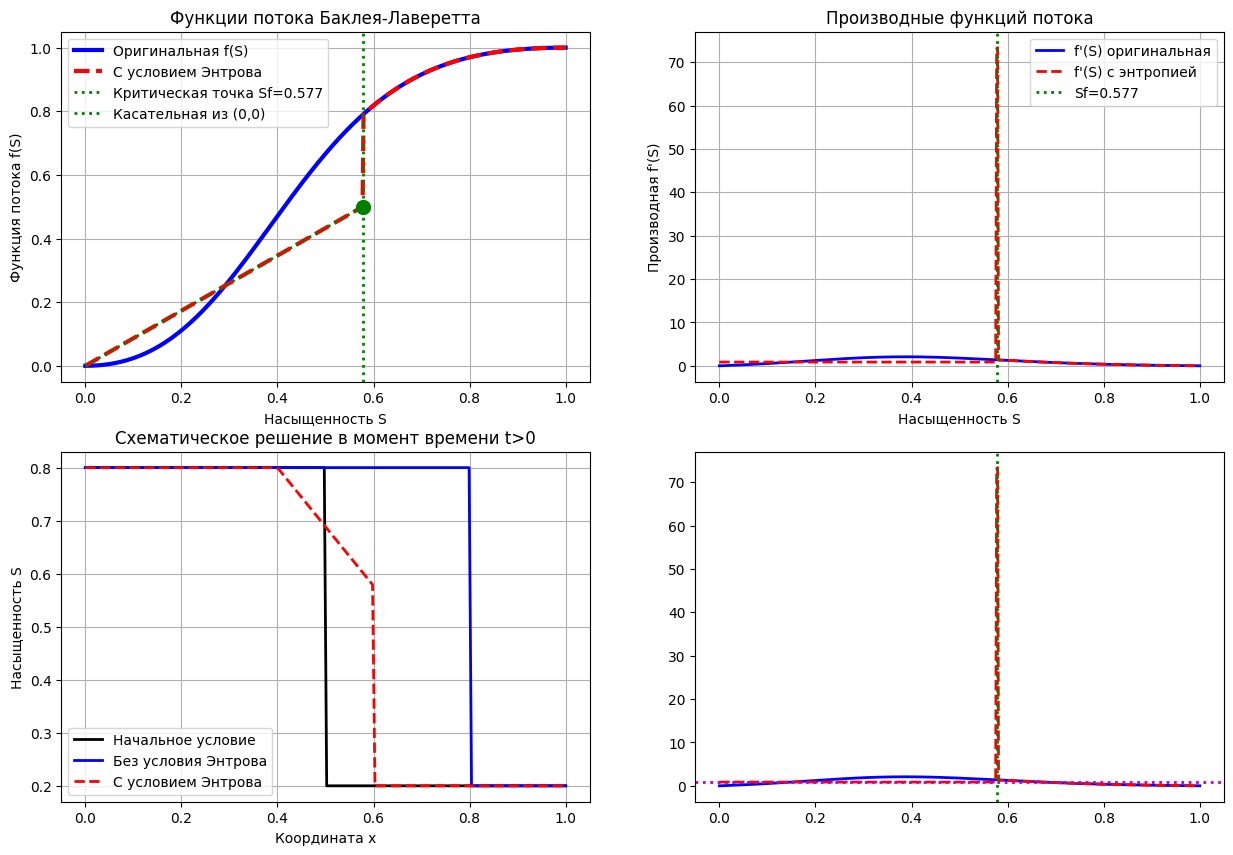

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Параметры
M = 2.0
Swc = 0.0
Sor = 0.0

# Создаем массив насыщенностей
S = np.linspace(0, 1, 500)

# Оригинальная функция потока Баклея-Лаверетта
f_original = S**2 / (S**2 + (1-S)**2 / M)

# Критическая точка
Sf = 1.0 / np.sqrt(M + 1.0)
f_Sf = 0.5  # Для Баклея-Лаверетта f(Sf) всегда = 0.5

# Функция потока с условием Энтрова (выпуклая оболочка)
slope = f_Sf / Sf
f_entropy = np.where(S < Sf, slope * S, f_original)

# Визуализация
plt.figure(figsize=(15, 10))

# График 1: Функции потока
plt.subplot(2, 2, 1)
plt.plot(S, f_original, 'b-', linewidth=3, label='Оригинальная f(S)')
plt.plot(S, f_entropy, 'r--', linewidth=3, label='С условием Энтрова')
plt.axvline(x=Sf, color='g', linestyle=':', linewidth=2, label=f'Критическая точка Sf={Sf:.3f}')
plt.plot([0, Sf], [0, f_Sf], 'g:', linewidth=2, label='Касательная из (0,0)')
plt.plot(Sf, f_Sf, 'go', markersize=10)
plt.xlabel('Насыщенность S')
plt.ylabel('Функция потока f(S)')
plt.title('Функции потока Баклея-Лаверетта')
plt.legend()
plt.grid(True)

# График 2: Производные функций потока
plt.subplot(2, 2, 2)
df_original = np.gradient(f_original, S)
df_entropy = np.gradient(f_entropy, S)
plt.plot(S, df_original, 'b-', linewidth=2, label="f'(S) оригинальная")
plt.plot(S, df_entropy, 'r--', linewidth=2, label="f'(S) с энтропией")
plt.axvline(x=Sf, color='g', linestyle=':', linewidth=2, label=f'Sf={Sf:.3f}')
plt.xlabel('Насыщенность S')
plt.ylabel("Производная f'(S)")
plt.title('Производные функций потока')
plt.legend()
plt.grid(True)

# График 3: Схематическое решение Римановой задачи
plt.subplot(2, 2, 3)
# Представим типичную начальную задачу: слева высокая насыщенность, справа низкая
x = np.linspace(0, 1, 200)
S_initial = np.where(x < 0.5, 0.8, 0.2)  # Скачок насыщенности

# Схематическое решение без условия Энтрова (нефизическое)
S_bad = np.where(x < 0.5 + 0.3, 0.8, 0.2)  # Простой скачок

# Схематическое решение с условием Энтропии (физическое)
S_good = np.zeros_like(x)
for i in range(len(x)):
    if x[i] < 0.4:
        S_good[i] = 0.8
    elif x[i] < 0.6:
        # Зона смешивания (разрежение)
        S_good[i] = 0.8 - (0.8 - 0.577) * (x[i] - 0.4) / 0.2
    else:
        S_good[i] = 0.2

plt.plot(x, S_initial, 'k-', linewidth=2, label='Начальное условие')
plt.plot(x, S_bad, 'b-', linewidth=2, label='Без условия Энтрова')
plt.plot(x, S_good, 'r--', linewidth=2, label='С условием Энтрова')
plt.xlabel('Координата x')
plt.ylabel('Насыщенность S')
plt.title('Схематическое решение в момент времени t>0')
plt.legend()
plt.grid(True)

# График 4: Скорости фронтов
plt.subplot(2, 2, 4)
# Скорость распространения = производная f'(S)
plt.plot(S, df_original, 'b-', linewidth=2, label='Скорость (оригинал)')
plt.plot(S, df_entropy, 'r--', linewidth=2, label='Скорость (с энтропией)')
plt.axvline(x=Sf, color='g', linestyle=':', linewidth=2, label=f'Sf={Sf:.3f}')
plt.axhline(y=slope, color='m', linestyle=':', linewidth=2, label='Скорость фронта')

# Показываем скорости для характерных точек
S_shock = 0.8  # Насыщенность за фронтом
v_shock = (f_entropy[S == S_shock][0] - 0) / (S_shock - 0)  # Скорость ударной волны
plt.axhline(y=v_shock, color='c', linestyle=':', linewidth=2, label='Скорость скачка')

plt.xlabel('Насыщенность S')
plt.ylabel("Скорость f'(S)")
plt.title('Скорости распространения возмущений')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Дополнительная информация
print("Критическая точка Sf =", Sf)
print("Наклон касательной =", slope)
print("Скорость фронта =", slope)
print("Скорость скачка для S=", S_shock, "равна", v_shock)